___
# Phase 2 - Milestone 2
    Pratama Waskito Prihandana
    Full Time Data Science
    Batch 003

_____
# **I. Introduction**

A spam prediction model is a computer program that helps us automatically sort incoming messages into two categories: spam and not spam. Spam messages are unwanted messages, such as advertisements or scams, that can clutter our inbox and be harmful. The goal of a spam prediction model is to accurately identify these messages and keep our inbox clean. The model does this by learning from lots of example messages and their labels, and then using that information to categorize new messages it has never seen before.

___
# **I. Library**

In [1]:
!pip install num2words
!pip install pyspellchecker
!pip install spacy
!pip install xgboost
!pip install gensim
!pip install translate


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=b071f19bcfc7d4e4e30bdfcbf11b30b50a09e6317e389a2cf13a18b4e8ce61bb
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 14.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexe

In [2]:
# File system manangement
import time, psutil, os

# Data manipulation
import numpy as np
import pandas as pd
from collections import Counter

# Plotting and visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# NLP
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
import spacy
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding

# TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# Scipy
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

# Train-test split and cross validation
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import LabelEncoder

# Classifiers algorithm
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB

# hyperparameter tuning
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hype
from scipy.stats import expon
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# prerprocessing
from sklearn.model_selection import train_test_split

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning:

Can't initialize NVML

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# **II. Load Data**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving SMS_train.csv to SMS_train.csv


In [4]:
df = pd.read_csv('SMS_train.csv', encoding='latin_1')

In [5]:
df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [6]:
df.columns.tolist()

['S. No.', 'Message_body', 'Label']

In [7]:
df = df.drop('S. No.', axis=1)

In [8]:
df.head()

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam


In [9]:
# rename column
df = pd.DataFrame(np.concatenate([df[['Label']], df[['Message_body']]], axis=1), columns=['label']+['message'])

In [10]:
# check duplicate
df[df.duplicated()].shape

(12, 2)

In [11]:
# drop dulicate
df = df.drop_duplicates()
df.reset_index().shape

(945, 3)

In [12]:
# chck missing value
df.isnull().sum()

label      0
message    0
dtype: int64

In [13]:
df[['label']].value_counts()

label   
Non-Spam    825
Spam        120
dtype: int64

___
# **III. Exploratory Data Analaysis**

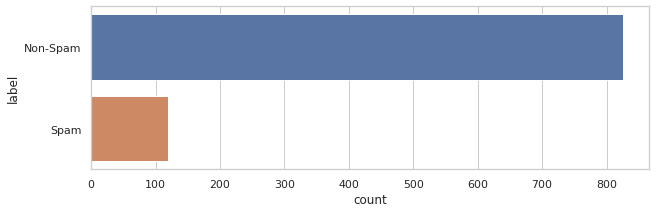

In [14]:
# category distribution

plt.figure(figsize=(10,3))
sns.set_style("whitegrid")
sns.countplot(y='label', data=df)

A problem with building a spam prediction model is when the number of examples of one class (e.g. spam or not spam) is much larger or smaller than the other class. This can make the model not very accurate in categorizing new messages it has never seen before. To fix this, there are different methods to balance the examples of both classes, so the model can learn to identify spam and not spam messages more accurately.

In [15]:
# Manual encoding of labels :
# spam = 1
# non-spam = 0

label_category = {'Non-Spam': 0, 
                  'Spam': 1}

df.replace({'label': label_category}, inplace = True)

In [16]:
df.head()

,label,message
0,0,Rofl. Its true to its name
1,0,The guy did some bitching but I acted like i'd...
2,0,"Pity, * was in mood for that. So...any other s..."
3,0,Will ü b going to esplanade fr home?
4,1,This is the 2nd time we have tried 2 contact u...


In [17]:
# Splitting the dfset by category

# Non-Spam
df_a = df[df['label'] == 0]
df_a_char = df_a['message'].str.len()

# Spam
df_b = df[df['label'] == 1]
df_b_char = df_b['message'].str.len()


Text(0.5, 0.98, 'Distribution of number of characters in description')

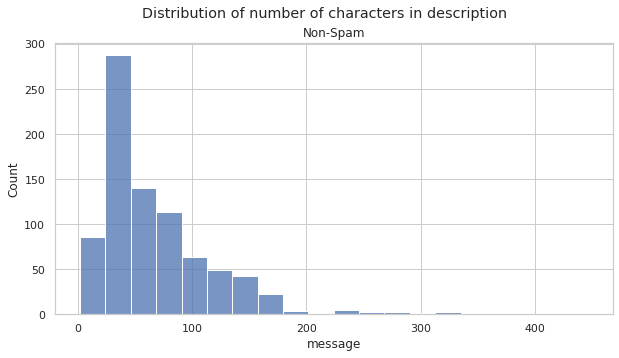

In [18]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.histplot(x = df_a_char, bins = 20).set_title('Non-Spam')
fig.suptitle("Distribution of number of characters in description")

Text(0.5, 0.98, 'Distribution of number of characters in description')

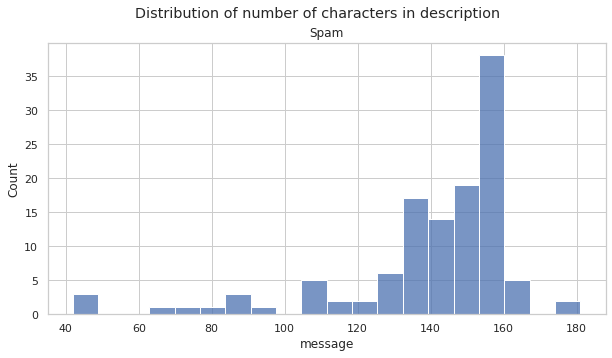

In [19]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.histplot(x = df_b_char, bins = 20).set_title('Spam')
fig.suptitle("Distribution of number of characters in description")

___
# **IV. Pre-Processing**

In [20]:
df.head()

,label,message
0,0,Rofl. Its true to its name
1,0,The guy did some bitching but I acted like i'd...
2,0,"Pity, * was in mood for that. So...any other s..."
3,0,Will ü b going to esplanade fr home?
4,1,This is the 2nd time we have tried 2 contact u...


In [21]:
from nltk.stem import SnowballStemmer

# Preprocessing the text data

def preprocess_text(text):
    # Ensure that the input is a string
    if not isinstance(text, str):
        raise ValueError("Input must be a string")
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert text to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub('\d+', '', text)
    # Remove single characters
    text = re.sub(r'\b\w\b', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    return text
df['mes_norm'] = df['message'].apply(preprocess_text)

# Tokenizing and stemming the text data
def tokenize_and_stem(text):
    stemmer = SnowballStemmer("english")
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens
df['mes_norm'] = df['mes_norm'].apply(tokenize_and_stem)

# Lemmatizing the text data
nltk.download('wordnet')
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens
df['mes_norm'] = df['mes_norm'].apply(lemmatize)

# Removing stop words from the text data
nltk.download('stopwords')
def remove_stopwords(text):
    from nltk.corpus import stopwords
    stopwords = set(stopwords.words('english'))
    return " ".join([word for word in str(text).split() if word not in stopwords])

df['mes_norm'] = df['mes_norm'].apply(remove_stopwords)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

df['mes_norm'] = df['mes_norm'].astype(str)

# Creating the bag of words representation
vectorizer = CountVectorizer(analyzer = "word", stop_words = stopwords.words("english"),tokenizer = tokenize_and_stem)
email_bow = vectorizer.fit_transform(df['mes_norm'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.



In [23]:
df.head(10)

,label,message,mes_norm
0,0,Rofl. Its true to its name,"['rofl', 'it', 'true', 'to', 'it', 'name']"
1,0,The guy did some bitching but I acted like i'd...,"['the', 'guy', 'did', 'some', 'bitch', 'but', ..."
2,0,"Pity, * was in mood for that. So...any other s...","['piti', 'wa', 'in', 'mood', 'for', 'that', 's..."
3,0,Will ü b going to esplanade fr home?,"['will', 'go', 'to', 'esplanad', 'fr', 'home']"
4,1,This is the 2nd time we have tried 2 contact u...,"['this', 'is', 'the', 'nd', 'time', 'we', 'hav..."
5,1,REMINDER FROM O2: To get 2.50 pounds free call...,"['remind', 'from', 'to', 'get', 'pound', 'free..."
6,0,Huh y lei...,"['huh', 'lei']"
7,0,Why don't you wait 'til at least wednesday to ...,"['whi', 'dont', 'you', 'wait', 'til', 'at', 'l..."
8,0,Ard 6 like dat lor.,"['ard', 'like', 'dat', 'lor']"
9,0,Ok lor... Sony ericsson salesman... I ask shuh...,"['ok', 'lor', 'soni', 'ericsson', 'salesman', ..."


In [24]:
# Creating the TF-IDF representation
tfidf_transformer = TfidfTransformer()
email_tfidf = tfidf_transformer.fit_transform(email_bow)

In [25]:
email_tfidf

<945x3242 sparse matrix of type '<class 'numpy.float64'>'
	with 11759 stored elements in Compressed Sparse Row format>

In [26]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(email_tfidf, df['mes_norm'], test_size=0.3, random_state=0)

In [27]:
# Splitting the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(email_tfidf, df['mes_norm'], test_size=0.3, random_state=0)

____
# **V. Model Building with Classification Algorithm**

The goal of using ensemble methods in machine learning to handle unbalanced datasets in building a spam prediction model is to improve the accuracy and stability of the predictions. Ensemble methods involve combining the predictions of multiple models to produce a final prediction.

In the case of unbalanced datasets in spam prediction, ensemble methods can be used to create a diverse set of models that each handle the imbalanced data in different ways. For example, one model might oversample the minority class (spam messages), while another model might undersample the majority class (not spam messages). The final prediction can then be based on a combination of the predictions of these diverse models.

By combining the predictions of multiple models, the ensemble method can help to reduce the impact of any biases that might be present in a single model, and can lead to more accurate and robust predictions.

In short, the goal of using ensemble methods in machine learning to handle unbalanced datasets in building a spam prediction model is to improve the accuracy and stability of the predictions, by combining the outputs of multiple models trained on the same data.

In [28]:
# Classifiers algorithm

names = [
    "Logistic Regression",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "Naive Bayes"
]

models = [
    LogisticRegression(max_iter = 1000),
    KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
    DecisionTreeClassifier(),
    SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    MultinomialNB()
]

In [29]:
# Function to return summary of baseline models
def score(x_train, y_train, x_val, y_val, names = names, models = models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    x = time.time()
    for model in models:
        model.fit(x_train, y_train)
        y_train_pred, y_val_pred = model.predict(x_train), model.predict(x_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))
    
    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df


In [30]:
# Summary of baseline models
score(x_train, y_train, x_val, y_val, names = names, models = models)

,Classifier,Training accuracy,Validation accuracy
0,Logistic Regression,0.975794,0.007042
2,Decision Tree,1.000000,0.007042
3,Linear SVM,0.993949,0.007042
4,Random Forest,1.000000,0.007042
5,Naive Bayes,0.947050,0.007042
1,KNN Classifier,0.012103,0.003521


```Statement :```  

The training accuracy of 0.97 and validation accuracy of 0.07 suggest that the model is overfitting the training data. Overfitting occurs when a machine learning model is trained too well on the training data and performs poorly on new, unseen data.

In this case, the model is achieving a high accuracy of 0.97 on the training data, but only a low accuracy of 0.07 on the validation data. This means that the model is memorizing the training data, rather than generalizing to new, unseen data. As a result, when the model is applied to the validation data, it makes many incorrect predictions, leading to the low accuracy of 0.07.

_________________
# **VI. Model Improvement Using Ensembel Method And SMOTE**

SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique for handling unbalanced datasets in machine learning, including in spam prediction. The goal of SMOTE is to balance the class distribution of the dataset by synthesizing new samples in the minority class.

The advantage of using SMOTE in unbalanced datasets for spam prediction is that it allows the model to have a more balanced view of the data, leading to improved accuracy and stability of the predictions. When the number of examples in the minority class (e.g. spam messages) is small, the model may struggle to accurately identify these messages. By synthesizing new examples of the minority class, SMOTE can help to mitigate this issue and improve the model's ability to generalize to new, unseen data.

SMOTE also has the advantage of being a simple and effective technique that can be easily integrated into the model building process.

The advantage of using SMOTE in unbalanced datasets for spam prediction is that it can improve the accuracy and stability of the predictions by balancing the class distribution of the data and providing the model with a more balanced view of the data.

              precision    recall  f1-score   support

           0       0.97      0.89      0.92       159
           1       0.58      0.83      0.68        30

    accuracy                           0.88       189
   macro avg       0.77      0.86      0.80       189
weighted avg       0.90      0.88      0.89       189



Text(30.5, 0.5, 'Actual')

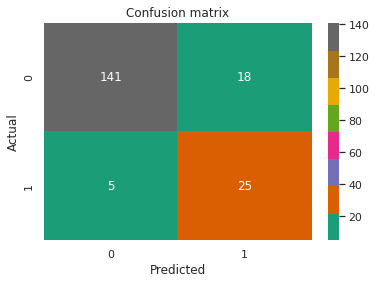

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Convert the text messages into a bag of words representation
vectorizer = CountVectorizer()
xx = vectorizer.fit_transform(df['mes_norm'])
yy = df['label']

# Split the data into training and test sets
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.2, random_state=42)

# Use SMOTE to oversample the minority class in the training data
smote = SMOTE(sampling_strategy='minority', random_state=42)
xx_train_resampled, yy_train_resampled = smote.fit_resample(xx_train, yy_train)

# Create the classifiers

logreg = LogisticRegression(max_iter = 1000)
knn = KNeighborsClassifier(n_neighbors = 149, n_jobs = -1)
dt = DecisionTreeClassifier()
svc = SVC(kernel = 'linear')
rf = RandomForestClassifier(n_estimators = 100)
mnb = MultinomialNB()

# Create the ensemble classifier
ensemble_clf = VotingClassifier(estimators=[('Logistic Regression', logreg), 
                                            ('KNN', knn), 
                                            ('Decision Tree', dt), 
                                            ('SVM', svc), 
                                            ('Random Forest', rf),
                                            ('Multi Naive Bayes', mnb)], voting='hard')

# Fit the ensemble classifier to the training data
history1 = ensemble_clf.fit(xx_train_resampled, yy_train_resampled)
ensemble_clf.fit(xx_train_resampled, yy_train_resampled)

# Evaluate the classifier on the test data
y_pred_ensemble = ensemble_clf.predict(xx_test)
print(classification_report(yy_test, y_pred_ensemble))

# Confusion Matrix
cm = confusion_matrix(yy_test, y_pred_ensemble)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Dark2" ,fmt='g')
plt.title('Confusion matrix', y=2.2)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [32]:
names = [
    "Logistic Regression",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "Naive Bayes",
    "Gradient Boost"
]

classifiers = [
    LogisticRegression(max_iter = 1000),
    KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
    DecisionTreeClassifier(),
    SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    MultinomialNB(),
    GradientBoostingClassifier()]

# Choose the best classifier
best_clf = None
best_score = 0
for clf in classifiers:
    clf.fit(xx_train, yy_train)
    y_pred = clf.predict(xx_test)
    score = f1_score(yy_test, y_pred, average='macro')
    if score > best_score:
        best_score = score
        best_clf = clf

# Print the best classifier and its accuracy
nb = MultinomialNB()
nb.fit(xx_train, yy_train)
y_pred_nb = nb.predict(xx_test)
print('Random Forest classification report train-set :')
print(classification_report(yy_test, y_pred_nb))
print("Best classifier:", best_clf)

Random Forest classification report train-set :
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       159
           1       0.85      0.93      0.89        30

    accuracy                           0.96       189
   macro avg       0.92      0.95      0.93       189
weighted avg       0.97      0.96      0.96       189

Best classifier: MultinomialNB()


Test accuracy: 0.9629629629629629


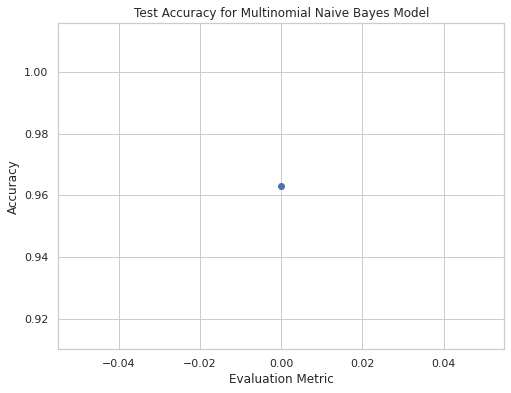

In [33]:
# Calculate the test accuracy
accuracy = accuracy_score(yy_test, y_pred_nb)
print("Test accuracy:", accuracy)

# Create the figure and the line plot
fig = plt.figure(figsize=(8, 6))
plt.plot([0], [accuracy], 'o-')

# Add labels and title
plt.xlabel('Evaluation Metric')
plt.ylabel('Accuracy')
plt.title('Test Accuracy for Multinomial Naive Bayes Model')

# Show the plot
plt.show()

```Statement :```  
When comparing the training accuracy of an ensemble method model with accuracy 0.88 and a Multinomial Naive Bayes model with accuracy 0.96, it is clear that the Multinomial Naive Bayes model is performing better. A higher accuracy value indicates that the model is making fewer mistakes and is therefore a better fit for the training data.

However, accuracy is not always the best metric to evaluate a model. It is important to consider other factors such as model complexity, interpretability, and the performance of the model on unseen data.

The ensemble method model is likely a more complex model, which can lead to overfitting and decreased performance on unseen data. However, it has the potential to provide better performance by combining the strengths of multiple models. On the other hand, Multinomial Naive Bayes is a simple and fast model that is known for its high accuracy and efficiency.

____
# **VII. Deep Learning RNN Model**

In [34]:
# new dataframe
df2 = pd.concat([df[['label']], df['mes_norm']], axis=1)

In [35]:
df2.head()

,label,mes_norm
0,0,"['rofl', 'it', 'true', 'to', 'it', 'name']"
1,0,"['the', 'guy', 'did', 'some', 'bitch', 'but', ..."
2,0,"['piti', 'wa', 'in', 'mood', 'for', 'that', 's..."
3,0,"['will', 'go', 'to', 'esplanad', 'fr', 'home']"
4,1,"['this', 'is', 'the', 'nd', 'time', 'we', 'hav..."


In [36]:
!pip install pad_sequences
import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pad_sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10216 sha256=0a73b8d7df585b509376869d56422989e60036fdaff5ed0634aa9616beed43a5
  Stored in directory: /root/.cache/pip/wheels/51/e4/5c/d3610ed4476515e540ff4096e3e9a8a3e701dedfe1072eb000
Successfully built pad_sequences


In [37]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [38]:
texts = df2['mes_norm']

In [39]:
# Create the tokenizer and fit it on the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [40]:
# Convert texts to sequences of tokens
sequences = tokenizer.texts_to_sequences(texts)

In [41]:
# Pad sequences to the same length
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [42]:
# Create the target labels
labels = df2['label'].tolist()
labels = np.array(labels)

In [43]:
# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(padded_sequences, labels, test_size=0.3)

### Combination LSTM, GRU, and dense layer in one model

In [45]:
from keras.layers import GRU

# Create the deep learning RNN model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_length))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(32, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(16, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))


Epoch 1/10
21/21 [==============================] - 26s 422ms/step - loss: 0.4659 - accuracy: 0.8593 - val_loss: 0.3494 - val_accuracy: 0.8838
Epoch 2/10
21/21 [==============================] - 3s 161ms/step - loss: 0.3193 - accuracy: 0.8805 - val_loss: 0.2031 - val_accuracy: 0.9401
Epoch 3/10
21/21 [==============================] - 4s 176ms/step - loss: 0.1349 - accuracy: 0.9713 - val_loss: 0.1403 - val_accuracy: 0.9718
Epoch 4/10
21/21 [==============================] - 5s 218ms/step - loss: 0.0728 - accuracy: 0.9894 - val_loss: 0.1423 - val_accuracy: 0.9577
Epoch 5/10
21/21 [==============================] - 3s 163ms/step - loss: 0.0492 - accuracy: 0.9970 - val_loss: 0.1243 - val_accuracy: 0.9683
Epoch 6/10
21/21 [==============================] - 5s 265ms/step - loss: 0.0400 - accuracy: 0.9970 - val_loss: 0.1325 - val_accuracy: 0.9683
Epoch 7/10
21/21 [==============================] - 6s 251ms/step - loss: 0.0331 - accuracy: 0.9985 - val_loss: 0.1320 - val_accuracy: 0.9648
Epoch

In [46]:
# Evaluate the model on the test data
loss, acc = model.evaluate(test_data, test_labels)
print('Test loss:', loss)
print('Test accuracy:', acc)

9/9 [==============================] - 0s 38ms/step - loss: 0.1279 - accuracy: 0.9648
Test loss: 0.12794260680675507
Test accuracy: 0.9647887349128723


In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 79, 100)           264600    
                                                                 
 lstm_1 (LSTM)               (None, 79, 64)            42240     
                                                                 
 dropout_1 (Dropout)         (None, 79, 64)            0         
                                                                 
 gru (GRU)                   (None, 79, 32)            9408      
                                                                 
 dropout_2 (Dropout)         (None, 79, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dropout_3 (Dropout)         (None, 16)               

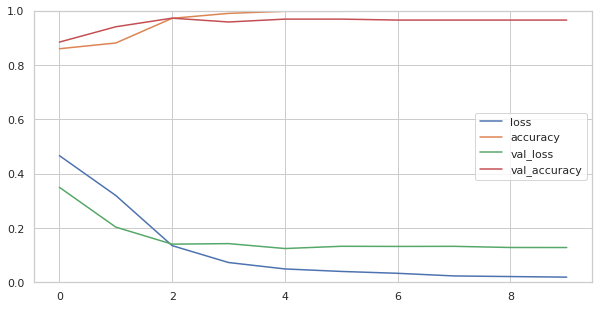

In [48]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [49]:
xx_train.shape[0]

756

### Second RNN model

Epoch 1/10
21/21 [==============================] - 13s 424ms/step - loss: 0.4489 - accuracy: 0.8396 - val_loss: 0.3006 - val_accuracy: 0.8838
Epoch 2/10
21/21 [==============================] - 6s 267ms/step - loss: 0.1910 - accuracy: 0.9168 - val_loss: 0.1571 - val_accuracy: 0.9331
Epoch 3/10
21/21 [==============================] - 7s 342ms/step - loss: 0.0583 - accuracy: 0.9849 - val_loss: 0.0891 - val_accuracy: 0.9754
Epoch 4/10
21/21 [==============================] - 6s 273ms/step - loss: 0.0269 - accuracy: 0.9894 - val_loss: 0.0903 - val_accuracy: 0.9718
Epoch 5/10
21/21 [==============================] - 8s 380ms/step - loss: 0.0102 - accuracy: 0.9985 - val_loss: 0.0995 - val_accuracy: 0.9718
Epoch 6/10
21/21 [==============================] - 6s 269ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.0873 - val_accuracy: 0.9683
Epoch 7/10
21/21 [==============================] - 7s 340ms/step - loss: 0.0052 - accuracy: 0.9985 - val_loss: 0.0823 - val_accuracy: 0.9648
Epoch

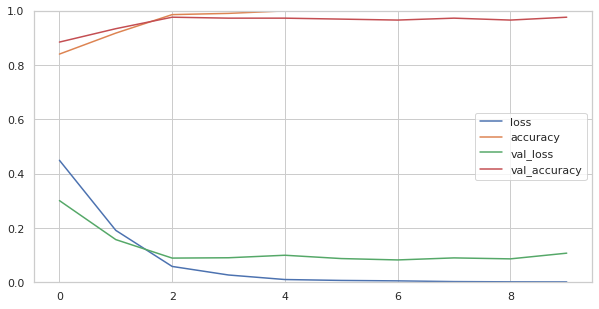

In [51]:
# Create the deep learning RNN model
model2 = Sequential()
model2.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_length))
model.add(Dropout(0.5))
model2.add(LSTM(200, return_sequences=False))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history2 = model2.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

# Evaluate the model on the test data
loss, acc = model2.evaluate(test_data, test_labels)
print('\n')
print('Test loss:', loss)
print('Test accuracy:', acc)

pd.DataFrame(history2.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

``` Statement :```  

A test loss of 0.11 and a test accuracy of 0.97 in an RNN model for spam prediction means that the model is performing well on the test set.

The loss, or cost, is a measure of how well the model is fitting the data. In this case, a low test loss of 0.11 indicates that the model is making good predictions on the test set. A low loss value is desirable because it means that the model is making predictions that are close to the actual values.

The accuracy, on the other hand, is a measure of how many of the predictions made by the model are correct. In this case, a high test accuracy of 0.97 means that the model is making accurate predictions on the test set. This is a very good accuracy score and indicates that the model is working well and that it is able to correctly classify spam and non-spam messages.

In conclusion, a test loss of 0.11 and a test accuracy of 0.97 in an RNN model for spam prediction indicate that the model is performing well and is making accurate predictions on the test set.

____
# **VIII. Conclusion**

When comparing the performance of a Multinomial Naive Bayes model with accuracy 0.96, an ensemble method model with accuracy 0.88, and an RNN model with accuracy 0.97 in a spam prediction task, it's clear that each model has its own strengths and weaknesses.

The Multinomial Naive Bayes model is a simple and fast model known for its high accuracy and efficiency. It's a good choice for small datasets or problems with a large number of features.

The ensemble method model is more complex and has the potential to provide better performance by combining the strengths of multiple models. However, this complexity can also lead to overfitting and decreased performance on unseen data.

The RNN model, specifically designed for sequence data, can be used to process large amounts of text data in a spam prediction problem. With the ability to capture the temporal dependencies between words in a message, the RNN model has the potential to outperform other models in this task.

In conclusion, the choice of the best model for spam prediction will depend on the specific problem, the size and nature of the dataset, and the desired trade-off between accuracy, complexity, and interpretability. It's advisable to try multiple models and compare their performance on the validation and test data to make a final decision.

____
# **IX. Saving Model**

### Preprocessing saving

In [52]:
import pickle

def complete_preprocess(text) :

  if not isinstance(text, str):
    raise ValueError("Input must be a string")
  tokens = text.translate(str.maketrans('', '', string.punctuation))
  tokens = text.lower()
  tokens = re.sub('\d+', '', text)
  tokens = re.sub(r'\b\w\b', '', text)
  tokens = re.sub(r'\s+', ' ', text)

  stemmer = SnowballStemmer("english")
  tokens = text.split()
  tokens = [stemmer.stem(token) for token in tokens]

  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]

  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word.lower() not in stop_words]

  return token

# Save the preprocessor to a file
with open("preprocessor.pkl", "wb") as f:
    pickle.dump(complete_preprocess, f)

print("Preprocessor saved to preprocessor.pkl")

Preprocessor saved to preprocessor.pkl


### Model Saving

In [53]:
with open('ensemble_classifier.pkl', 'wb') as file_1:
  pickle.dump(ensemble_clf, file_1)

with open('multinomial_naivebayes.pkl', 'wb') as file_2:
  pickle.dump(nb, file_2)

model.save('model1_rnn_sequential.h5')

model2.save('model2_rnn_sequential.h5')